<center><h1>Deep Survelliance - Emotion Detector</h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install pyunpack

  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=681a5437a74640a0c0a9797befeae4f3cd8f94f51e820e118071968b08b3ce21
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
from pyunpack import Archive

Archive('/content/drive/My Drive/Deep Surveillance/2.1 fer2013.zip.zip').extractall('/content/')

# Data Augmentation

In [4]:
import keras

from keras_preprocessing.image import ImageDataGenerator

tr_img_gen = ImageDataGenerator(rotation_range = 30,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            rescale = 1/255,
                            zoom_range = 0.2)

Using TensorFlow backend.


In [5]:
print('Number of classes in the train folder:\n')

tr_img_gen.flow_from_directory('/content/fer2013/train')

Number of classes in the train folder:

Found 28709 images belonging to 7 classes.


In [6]:
print('Class indices in the train folder:\n')

tr_img_gen.flow_from_directory('/content/fer2013/train').class_indices

Class indices in the train folder:

Found 28709 images belonging to 7 classes.


{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

# Model building

In [0]:
from keras.models import Sequential, Model

from keras.layers import Dropout, Flatten, Conv2D, MaxPool2D, Activation, Dense, BatchNormalization

from keras import regularizers

# Creating callbacks such as TensorBoard, ModelCheckpoint and EarlyStopping

In [0]:
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_1 = ModelCheckpoint("/content/emotion_model.h5", monitor = "train_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_1 = EarlyStopping(monitor = 'train_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_1 = TensorBoard(log_dir = "/content/emotion_graph_1",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_1 = [checkpoint_1, earlystop_1, tensorboard_1]

In [0]:
import os

im = os.listdir('/content/fer2013/train/Angry')

In [10]:
import cv2

img = cv2.imread('/content/fer2013/train/Angry/'+im[1])

img.shape

(48, 48, 3)

In [0]:
input_shape = (48, 48, 1)
batch_size = 32
num_classes = 7

In [21]:
import warnings
warnings.filterwarnings('ignore')


model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_initializer = 'he_normal'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_initializer = 'he_normal'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_initializer = 'he_normal'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = input_shape, activation = 'elu', kernel_initializer = 'he_normal'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('elu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

NameError: name 'Sequential' is not defined

Architecture

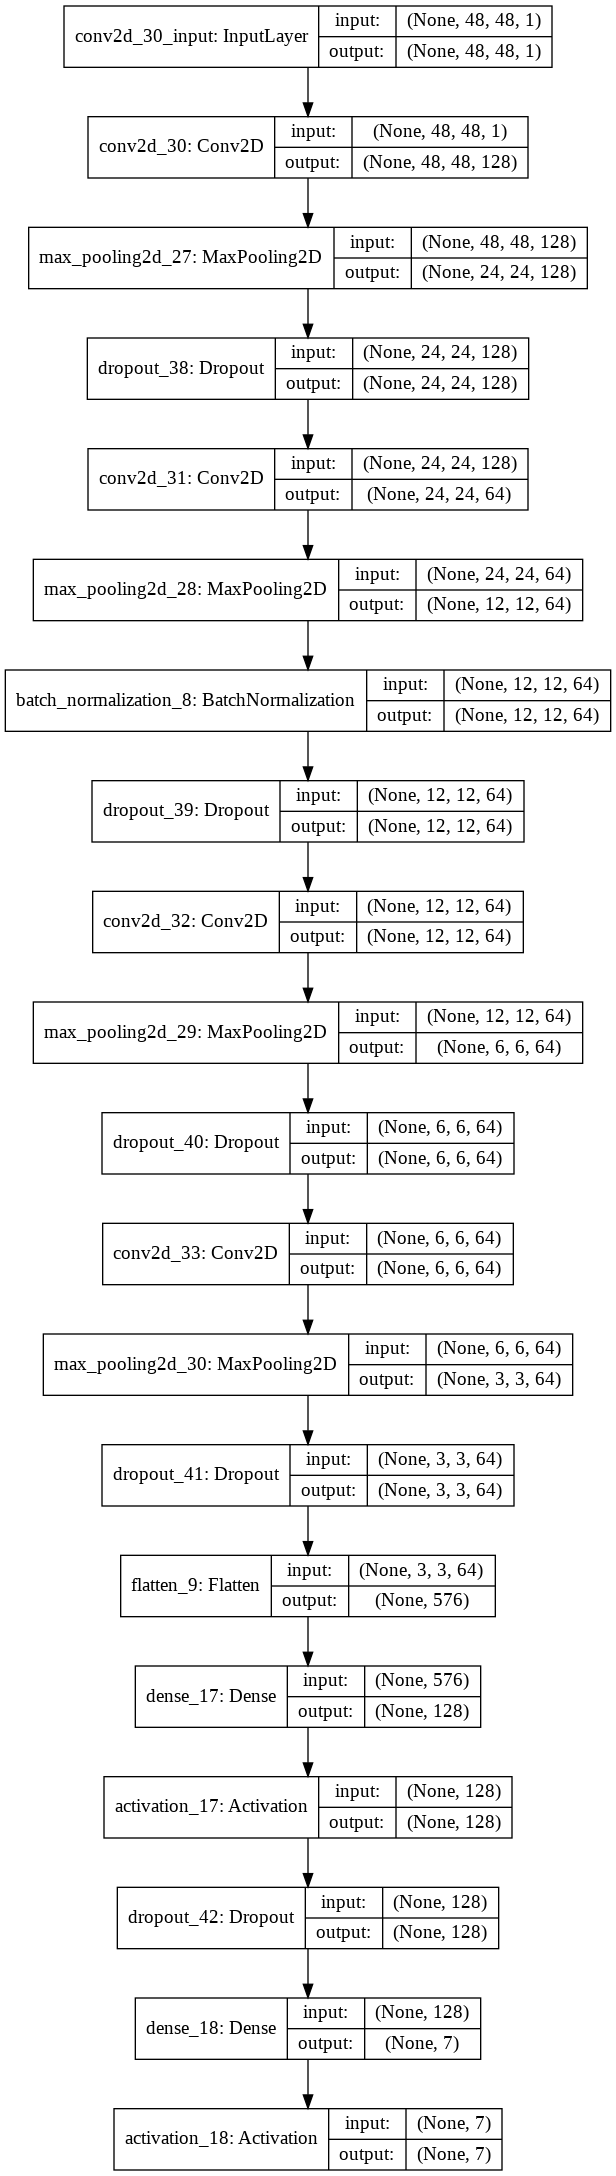

In [265]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file = 'emotion_arc.png', show_shapes = True, show_layer_names = True)

Image(retina = True, filename = 'emotion_arc.png')

In [266]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 48, 48, 128)       1280      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_39 (Dropout)         (None, 12, 12, 64)       

In [267]:
tr_flow = tr_img_gen.flow_from_directory(('/content/fer2013/train'),
                                         target_size = input_shape[:2],
                                         color_mode = 'grayscale',
                                         class_mode = 'categorical',
                                         batch_size = batch_size,
                                         shuffle = True)

Found 28709 images belonging to 7 classes.


In [268]:
3589//16

224

In [269]:
val_img_gen = ImageDataGenerator()

val_flow = val_img_gen.flow_from_directory(('/content/fer2013/validation'),
                                         target_size = input_shape[:2],
                                         color_mode = 'grayscale',
                                         class_mode = 'categorical',
                                         batch_size = batch_size,
                                         shuffle = True)

Found 3589 images belonging to 7 classes.


# Fit model

In [270]:
import warnings
warnings.filterwarnings('ignore')

result = model.fit_generator(tr_flow, 
                             steps_per_epoch = 28709//16,
                             epochs = 10, callbacks = callback_1,
                             validation_data = val_flow,
                             validation_steps = 3589//16)

Epoch 1/10
1794/1794 [==============================] - 49s 27ms/step - loss: 0.4124 - acc: 0.8515 - val_loss: 3.9579 - val_acc: 0.7484
Epoch 2/10
1794/1794 [==============================] - 49s 27ms/step - loss: 0.3766 - acc: 0.8577 - val_loss: 3.6542 - val_acc: 0.7570
Epoch 3/10
1794/1794 [==============================] - 48s 27ms/step - loss: 0.3598 - acc: 0.8633 - val_loss: 4.0208 - val_acc: 0.7477
Epoch 4/10
1794/1794 [==============================] - 48s 27ms/step - loss: 0.3433 - acc: 0.8684 - val_loss: 3.0134 - val_acc: 0.7624
Epoch 5/10
1794/1794 [==============================] - 48s 27ms/step - loss: 0.3329 - acc: 0.8711 - val_loss: 2.7099 - val_acc: 0.7601
Epoch 6/10
1794/1794 [==============================] - 48s 27ms/step - loss: 0.3266 - acc: 0.8731 - val_loss: 2.6696 - val_acc: 0.7644
Epoch 7/10
1794/1794 [==============================] - 48s 27ms/step - loss: 0.3205 - acc: 0.8750 - val_loss: 3.0515 - val_acc: 0.7622
Epoch 8/10
1794/1794 [==========================

In [274]:
# Saving model to JSON

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Saving weights to HDF5
model.save_weights("emotion_model_2.h5")
print("Saved model to disk.")

Saved model to disk.


In [24]:
import keras
from keras.models import model_from_json

# Loading json and create model
json_file = open('model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# Loading weights into new model
loaded_model.load_weights("emotion_model_1_2.h5")
print("Loaded model from disk.")

Loaded model from disk.


# Prediction

In [0]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
class_labels = tr_flow.class_indices
class_labels = {k:i for i, k in class_labels.items()}

class_labels

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Neutral',
 5: 'Sad',
 6: 'Surprise'}

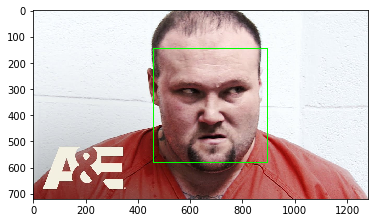

In [25]:
# import image
img = cv2.imread('angry.jpg')
img_copy = img.copy()
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)


# import cascade classifier for face
face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_detect = face.detectMultiScale(img_copy, 1.3, 5)

if face_detect is ():
    print('No face found')

faces = []
reacts = []
for f in face_detect:
    x, y, w, h = f
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 3)
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    #face = gray[y:y+h, x:x+w]
    face = cv2.resize(gray, (48, 48), interpolation = cv2.INTER_AREA)
    faces.append(face)
    reacts.append((x, y, w, h))
    plt.imshow(img_copy)

plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


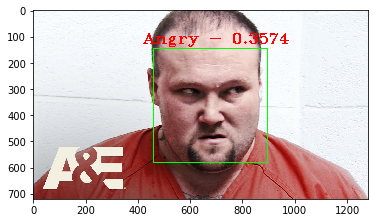

In [26]:
i = 0
for fa in faces:
    roi = fa.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis = 0)

    # making prediction and then get the class
    preds = loaded_model.predict(roi)[0]
    label = class_labels[preds.argmax()]
    labels = (label + ' - ' + str(round(preds.max(), 4)))
    # put text on images
    #label_position = (reacts[i][0] + int((reacts[i][1]/2)), abs(reacts[i][2] - 10))
    label_position = (reacts[0][0] - 40 , reacts[0][1] - 20)
    #label_position = (reacts[0][0] - 40 , reacts[0][1] - 20)

    i =+ 1
    cv2.putText(img_copy, labels, label_position, cv2.FONT_HERSHEY_COMPLEX_SMALL, 3, (255, 0, 0), thickness = 3)

plt.imshow(img_copy)

In [27]:
preds

array([0.35742423, 0.02154608, 0.27698526, 0.04719859, 0.10794144,
       0.16689906, 0.02200535], dtype=float32)

<center><h1>Video<h1>

In [3]:
class_labels 

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Neutral',
 5: 'Sad',
 6: 'Surprise'}

In [1]:
class_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

In [16]:
import keras
from keras.models import model_from_json

# Loading json and create model
json_file = open('model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# Loading weights into new model
loaded_model.load_weights("emotion_model_1_2.h5")
print("Loaded model from disk.")

Loaded model from disk.


In [3]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import cv2

# import cascade classifier for face
#face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, frames = cap.read()
    #img_copy = cv2.cvtColor(frames, cv2.COLOR_BGR2RGB)
    face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    face_detect = face.detectMultiScale(frames, 1.3, 5)
    
    #if face_detect is ():
     #   print('No face found')

    #faces = []
    #reacts = []
    for f in face_detect:
        x, y, w, h = f
        cv2.rectangle(frames, (x, y), (x+w, y+h), (0, 255, 0), 1)
        gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(gray, (48, 48), interpolation = cv2.INTER_AREA)
        #faces.append(face)
        #reacts.append((x, y, w, h))

        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        #roi = np.asarray(roi)
        roi = np.expand_dims(roi, axis = 0)

            # making prediction and then get the class
        preds = loaded_model.predict(roi)[0]
        label = class_labels[preds.argmax()]
        labels = (label + ' - ' + str(round(preds.max(), 4)))
            # put text on imagesa
            #label_position = (reacts[i][0] + int((reacts[i][1]/2)), abs(reacts[i][2] - 10))
            #label_position = (reacts[0][0] + reacts[0][2] + 10, reacts[0][1])
        #label_position = (face[0] - 40 , face[1] - 20)
        label_position = (f[0] - 40 , f[1] - 20)

        cv2.putText(frames, labels, label_position, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), thickness = 2)
      
        cv2.imshow('Facial Emotion Detector', frames)
        
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break
        
cap.release()
cv2.destroyAllWindows()